In [11]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import math
from tagger import Tagger
from sentence_transformers import SentenceTransformer
import umap.umap_ as umap


valids = pd.read_csv('../data/valid_all.csv')
valids = valids[:10]

In [2]:
# pre-trained Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

responses = valids['Response'].tolist()
embeddings = model.encode(responses)
embeddings_df = pd.DataFrame(embeddings)
valids = pd.concat([valids, embeddings_df], axis=1)


/Users/kaylahuang/opt/anaconda3/envs/mercor/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/kaylahuang/opt/anaconda3/envs/mercor/lib/python3.12/site-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


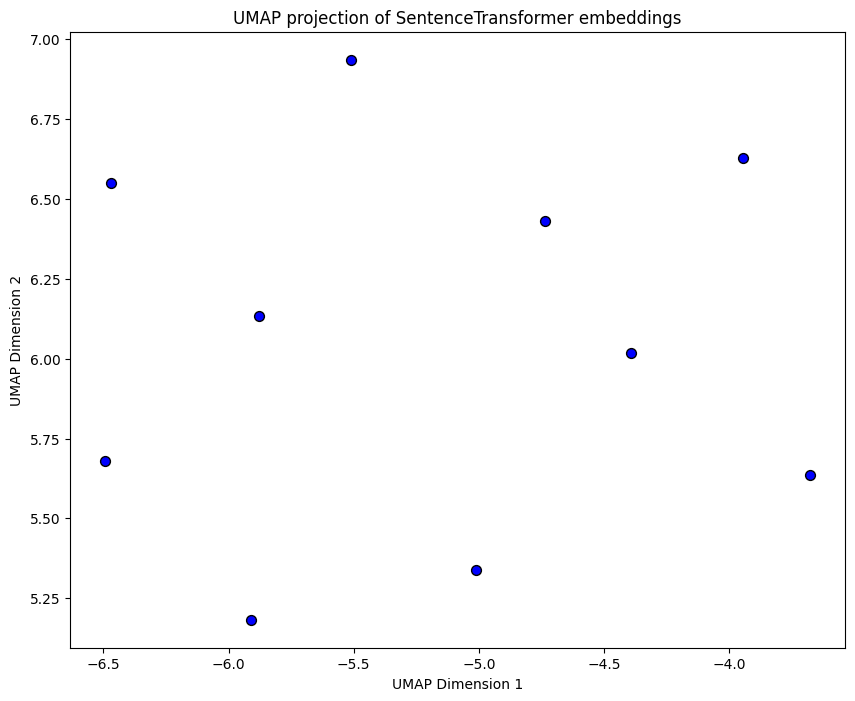

In [12]:
# initialize
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the embeddings to 2D space
umap_embeddings = umap_model.fit_transform(embeddings_df)
umap_embeddings_df = pd.DataFrame(umap_embeddings, columns=['UMAP_1', 'UMAP_2'])
valids = pd.concat([valids, umap_embeddings_df], axis=1)

# plot umap embeddings
plt.figure(figsize=(10, 8))
plt.scatter(umap_embeddings_df['UMAP_1'], umap_embeddings_df['UMAP_2'], c='blue', edgecolor='k', s=50)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP projection of SentenceTransformer embeddings')
plt.show()
